In [147]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [148]:
# Load the data
data = pd.read_csv("/Users/zahiramohammed/Desktop/Book6.csv")
data.head(5)

,Age,Gender,Ln Age,Parental_Status,Parental_Educational_Support,Has_Internet,Extracurricular_Activities,Weekly_Study_Time_4,EA& WST-4,Internet& WST-4,Weekly_Study_Time,Grade_1st_Semester,Desire_Graduate_Education
0,15,0,2.708050,1,0,1,1,1,1,1,4,12,1
1,16,1,2.772589,1,0,1,0,1,0,0,4,13,1
2,17,0,2.833213,1,1,1,1,0,0,0,1,9,0
3,16,0,2.772589,0,1,0,0,0,0,0,2,9,1
4,16,1,2.772589,1,1,1,0,0,0,0,3,9,1


In [149]:
dependent_var = 'Desire_Graduate_Education'
continuous_vars = ['Age', 'Grade_1st_Semester']
ordinal_var = ['Gender','Parental_Status','Parental_Educational_Support','Extracurricular_Activities','Weekly_Study_Time_4']

In [150]:
# Splitting the dataset into the Training set and Test set
X = data[continuous_vars + ordinal_var]
y = data[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.24, random_state=42)


In [151]:
# Create logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [152]:
# Predicting the Test set results
y_pred = model.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

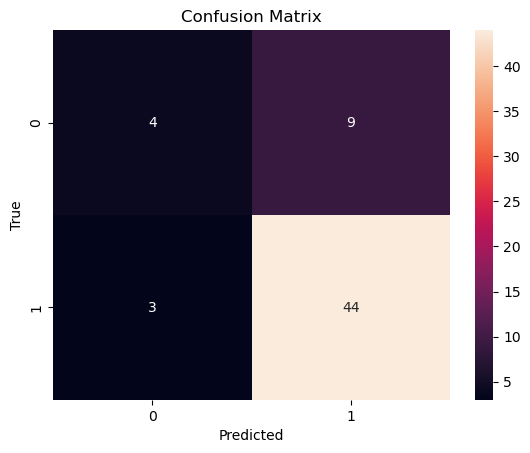

              precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.83      0.94      0.88        47

    accuracy                           0.80        60
   macro avg       0.70      0.62      0.64        60
weighted avg       0.77      0.80      0.78        60



In [153]:
# Visualising the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

In [154]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.8


In [156]:
#Fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


#Get the intercept & coefficients from the sklearn model
intercept = model.intercept_[0]
print("Intercept (beta_0):", intercept)
coefficients = model.coef_[0]
print("Coefficients (beta_1, beta_2, ..., beta_n):", coefficients)

import statsmodels.api as sm

# Adding a column of ones to X_train for the intercept
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Get the p-values from the statsmodels model
p_values = logit_model.pvalues

print("P-values:", p_values)

Intercept (beta_0): 1.6908354147113176
Coefficients (beta_1, beta_2, ..., beta_n): [-0.30108273  0.43438875  0.11253255  0.13930523  0.43863948 -0.30482075
 -0.23035241]
Optimization terminated successfully.
         Current function value: 0.471980
         Iterations 6
P-values: const                           0.516534
Age                             0.034317
Grade_1st_Semester              0.000004
Gender                          0.742995
Parental_Status                 0.721011
Parental_Educational_Support    0.197610
Extracurricular_Activities      0.380960
Weekly_Study_Time_4             0.665666
dtype: float64


In [120]:
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score

In [122]:
# Make predictions  
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ROC Curve 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
print("AUC Score:", roc_auc_score(y_test, y_prob))

AUC Score: 0.8592471358428805


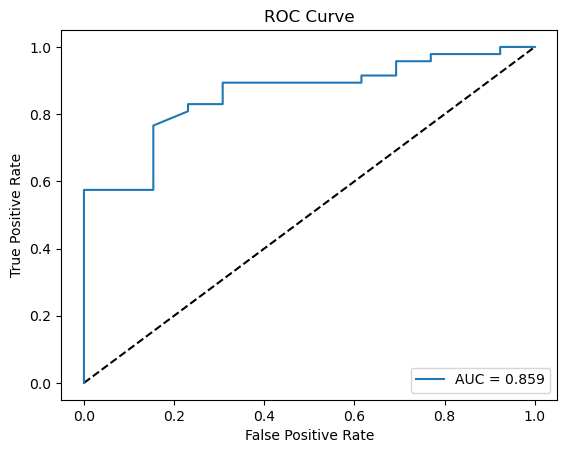

In [123]:
# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = {0:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [113]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.23
R^2 Score: -0.19542619542619555


In [75]:
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

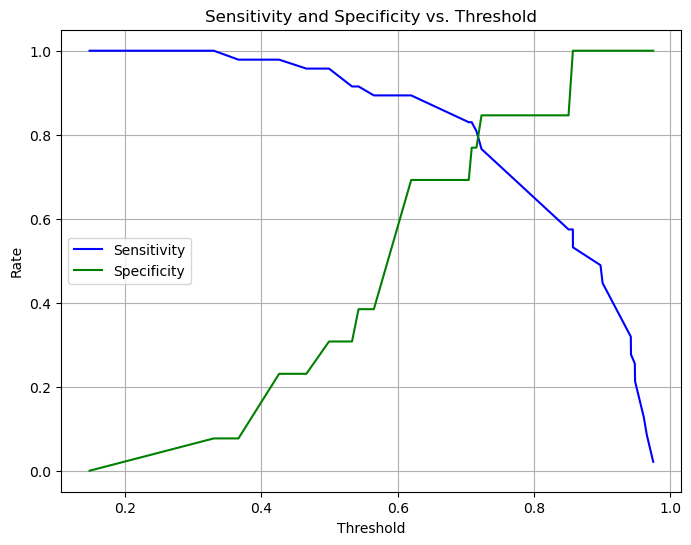

In [76]:
# Plot sensitivity/specificity plot
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, color='blue', label='Sensitivity')
plt.plot(thresholds, 1-fpr, color='green', label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Sensitivity and Specificity vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()



In [165]:
# Display results
print(f'True Positives: {tp}')
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Accuracy: {accuracy:.2f}')


True Positives: 53
True Negatives: 7
False Positives: 11
False Negatives: 4
Sensitivity: 0.93
Specificity: 0.39
Accuracy: 0.80
